In [ ]:
# paths = glob("Data/nc_block_previo/*.nc")
# for path in paths:
#     ds = xr.open_dataset(path)
#     if os.path.isfile("Data/nc_block_nuevo/0Depth.nc") == False:
#         ds["Depth"].to_netcdf("Data/nc_block_nuevo/0Depth.nc", engine="netcdf4")
#     else:
#         pass
#     name = path.split("\\")[1].split(".")[0]
#     for key in ds.keys():
#         if key == "Depth":
#             pass
#         else:
#             ds[key].to_netcdf("Data/nc_block_nuevo/"+name+'_'+key+'.nc', engine="netcdf4")
# print("Finished")

In [4]:
from dask.distributed import Client
client = Client(n_workers=4)
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 15.89 GiB
Comm: tcp://127.0.0.1:51827,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 15.89 GiB
Comm: tcp://127.0.0.1:51852,Total threads: 1
Dashboard: http://127.0.0.1:51853/status,Memory: 3.97 GiB
Nanny: tcp://127.0.0.1:51831,


In [5]:
import os
import xarray as xr
from glob import glob

variables = ['Dir', 'Hsig', 'TPsmoo', 'Tm02', 'Tm_10', 'Hswell', 'Wlen', 'Steepn', 'E', 'Power', 'mu', 'Te']

In [9]:
%%time

ds_hsig = xr.open_mfdataset(
    "Data/nc_block_nuevo/*_Hsig.nc", 
    concat_dim="time", 
    combine="nested",
    parallel=True,
    )

Wall time: 9min 18s


In [13]:
%%time

ds_hsig = ds_hsig.load()
ds_hsig

Wall time: 18min 53s


<xarray.Dataset>
Dimensions:  (lat: 61, lon: 73, time: 29216)
Coordinates:
  * time     (time) datetime64[ns] 2009-01-01 ... 2018-12-31T21:00:00
  * lat      (lat) float64 -33.25 -33.24 -33.23 -33.22 ... -32.77 -32.76 -32.75
  * lon      (lon) float64 -72.0 -71.99 -71.98 -71.97 ... -71.42 -71.41 -71.4
Data variables:
    Hsig     (time, lat, lon) float32 2.798 2.795 2.793 2.79 ... nan nan nan nan

In [15]:
%%time

ds_hsig_qt = ds_hsig.quantile([0, 0.25, 0.5, 0.75, 1], dim="time", interpolation="midpoint", numeric_only=True)
ds_hsig_qt

Wall time: 8.78 s


<xarray.Dataset>
Dimensions:   (lat: 61, lon: 73, quantile: 5)
Coordinates:
  * lat       (lat) float64 -33.25 -33.24 -33.23 -33.22 ... -32.77 -32.76 -32.75
  * lon       (lon) float64 -72.0 -71.99 -71.98 -71.97 ... -71.42 -71.41 -71.4
  * quantile  (quantile) float64 0.0 0.25 0.5 0.75 1.0
Data variables:
    Hsig      (quantile, lat, lon) float64 0.6932 0.6935 0.6939 ... nan nan nan

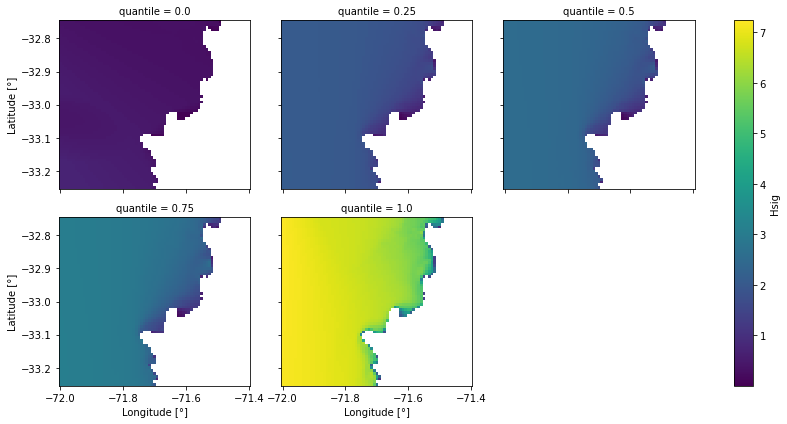

In [36]:
ds_hsig_qt.Hsig.plot(x="lon", y="lat", col="quantile", col_wrap=3, aspect=1.25, size=3)

In [37]:
client.shutdown()